## **Overview**
**we will explore how to develop a suite of different types of LSTM models for time series forecasting.**

* ### **Univariate LSTM Models**

1. Data Preparation
2. Vanilla LSTM
3. Stacked LSTM
4. Bidirectional LSTM
5. CNN LSTM
6. ConvLSTM


* ### **Multivariate LSTM Models**

* ### **Multi-Step LSTM Models**

* ### **Multivariate Multi-Step LSTM Models**



In [205]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dense, Dropout
from keras.layers import MaxPooling1D, Conv1D,Flatten
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
import os
import glob
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from pygame import mixer
import time

In [206]:
mixer.init()
mixer.music.load('../../Resources/ExecuteTipAudio.mp3')

## Univariate LSTM Models
LSTMs can be used to model univariate time series forecasting problems.

These are problems comprised of a single series of observations and a model is required to learn from the series of past observations to predict the next value in the sequence.

We will demonstrate a number of variations of the LSTM model for univariate time series forecasting

## Define variable

In [207]:
reshape1 = 0

## 1. CEEMDAN Data Preparation

In [8]:
IMF = []
xlsx_file = '../../Data/CEEMDAN/58606_2/OneDay/'
xlsx_path = glob.glob(os.path.join(xlsx_file,'*.xlsx'))

data_col_len = pd.read_excel('../../Data/CEEMDAN/58606_2/OneDay/CEEMDAN_58606 Station_g.xlsx',header=None)

for imf_len in range(len(data_col_len.columns)):
    for file in xlsx_path:
         print(file)
         # print(os.path.basename(file))
         imfs = pd.read_excel(file,header=None)
         imfn = imfs.iloc[:,imf_len]
         imfn.to_numpy()
         IMF.append(imfn)
    print(imf_len,"-------------------")

../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_a.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_b.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_c.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_d.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_e.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_f.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_g.xlsx
0 -------------------
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_a.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_b.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_c.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_d.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_e.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_f.xlsx
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_g.xlsx
1 -------------------
../../Data/CEEMDAN/58606_2/OneDay\CEEMDAN_58606 Station_a.xlsx
../../Data/

In [18]:
IMF[0][10]

0.5849449916688264

### 结果绘制

In [19]:
def Result_Ana(Model, feature_num):
    print('Result_Ana_Function:',testX.shape)
    y_pred = Model.predict(testX)
    y_pred = np.array(y_pred).reshape(-1, 1)
    # 将一个数组prediction在最后一个轴上（即axis=-1）进行复制，重复8次，并将结果存储在prediction_copies_array数组中
    prediction_copies_array = np.repeat(y_pred, feature_num,axis=-1)
    prediction_copies_array
    print('-----------prediction copy Shape：',prediction_copies_array.shape,'------------------')
    # Multi Var prediction
    pred = scaler.inverse_transform(np.reshape(prediction_copies_array, (len(y_pred), feature_num)))[:,feature_num-1] #进行逆变换但是，只需要最后一列
    # Single prediction
    # pred = scaler.inverse_transform(y_pred) #进行逆变换但是，只需要最后一列

    # print(pred)
    print('testY of shape :',testY.shape)
    y_true = np.array(testY).reshape(-1, 1)
    original_copies_array = np.repeat(testY, feature_num, axis=-1)
    print('IMF_True:',scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num))))
    y_true = scaler.inverse_transform(np.reshape(original_copies_array, (len(testY), feature_num)))[:, feature_num-1]

    print('feature_num-1_ETO_true:',y_true)

    # Single true value
    # y_true = scaler.inverse_transform(np.array(testY).reshape(-1,1))

    # y_true
    # pred

    print(pred)
    plt.plot(y_true, color='red', label='Real Value')
    plt.plot(pred, color='blue', label='Pred Value')
    plt.title('Prediction ETO (mm)')
    plt.xlabel('Time (day)')
    plt.ylabel('ETO (mm)')
    plt.legend()
    plt.show()

    # plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)

    # y_true_data = pd.DataFrame(y)
    # y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
    #               index=False)
    # pred_data = pd.DataFrame(pred)
    # pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
    #              index=False)

    print('MSE:',mse(y_true,pred))
    print('MAE:',mae(y_true,pred))
    print('R²:',r2(y_true,pred))
    print('RMSE:',np.sqrt(mse(y_true,pred)))
    print('pred_finally:',pred)

    return y_true,pred

In [20]:
len(IMF)

112

In [21]:
feature_num = len(IMF) / 7

In [22]:
feature_num

16.0

In [23]:
IMF[0:7][2]

0       -0.454365
1        0.396571
2       -1.770660
3        1.786784
4       -1.002048
           ...   
24525   -0.614148
24526   -0.659385
24527    0.883395
24528   -0.437380
24529    1.188857
Name: 0, Length: 24530, dtype: float64

In [24]:
import tensorflow as tf

# Check if GPU is available and set the GPU device
# if tf.test.is_gpu_available():
#     physical_devices = tf.config.list_physical_devices('GPU')
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)


### LSTM

-------------------------- 0 --------------------------
            one       two     three      four      five            six  \
0     -1.464790 -0.919115 -0.454365 -0.700750  4.012725     685.750749   
1      0.602649  1.217254  0.396571 -0.935308  1.183604    -813.232746   
2      1.359043  1.732350 -1.770660  1.522547 -3.100436    -640.572992   
3      0.450546 -0.091290  1.786784  1.385560  3.499083     544.515857   
4     -1.818005 -0.277202 -1.002048 -0.330014 -3.927123    -225.735636   
...         ...       ...       ...       ...       ...            ...   
24525 -1.318127 -0.733819 -0.614148  0.475756  2.895771 -352873.241491   
24526 -0.154782 -0.111291 -0.659385 -0.358708 -0.420595  436446.198249   
24527  0.122398 -0.078915  0.883395  0.054605 -0.756205 -513694.896792   
24528  0.550918  0.530208 -0.437380 -0.031215  1.639937  544410.537922   
24529  0.561766  0.728185  1.188857  0.095620 -2.894580 -450402.121704   

          seven  
0     -0.363139  
1     -0.151901  
2

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/20
307/307 [==============================] - 2s 2ms/step - loss: 0.0588 - accuracy: 0.0000e+00 - val_loss: 0.0128 - val_accuracy: 2.0387e-04
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 2.0387e-04
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0140 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 2.0387e-04
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 2.0387e-04
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0125 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 2.0387e-04
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.0000e+00 - val_loss: 0.0121 - val_accuracy: 2.0387e-04
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0119 - accuracy: 0.0000e

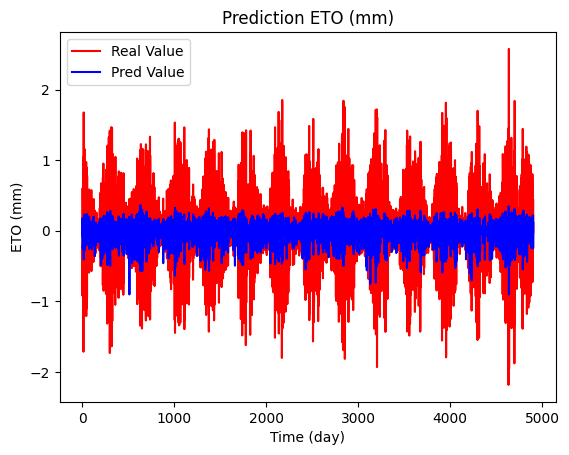

MSE: 0.25349897771531155
MAE: 0.36701360338997113
R²: 0.08123682212381589
RMSE: 0.5034868198029732
pred_finally: [-0.23589398 -0.00229693  0.17881492 ...  0.1271679  -0.25060254
  0.11220078]
prediction_result: [-0.23589398 -0.00229693  0.17881492 ...  0.1271679  -0.25060254
  0.11220078]
lstm_y_turs: [-0.22846669 -0.9194061   0.47041622 ...  0.22694627 -0.03973494
  0.43138383]
-------------------------- 1 --------------------------
            one       two     three      four      five            six  \
0     -0.717649 -0.700243 -1.302272  1.167898  2.246833    -266.541681   
1     -0.067041  0.133359 -1.809280  1.549877  0.945760    -702.111248   
2      0.406846  0.474059 -0.593264  1.616759  0.143621    -308.938576   
3      0.233040  0.235515  1.043773  1.200236 -0.919376     127.959321   
4     -0.127228 -0.141003  1.191214  0.368845 -0.945895      63.058347   
...         ...       ...       ...       ...       ...            ...   
24525  0.130000  0.020085 -0.993216  0.02743

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.1268 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0115 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 2.0387e-04
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 2.0387e-04
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 2.0387e-04
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 2.0387e-04
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_l

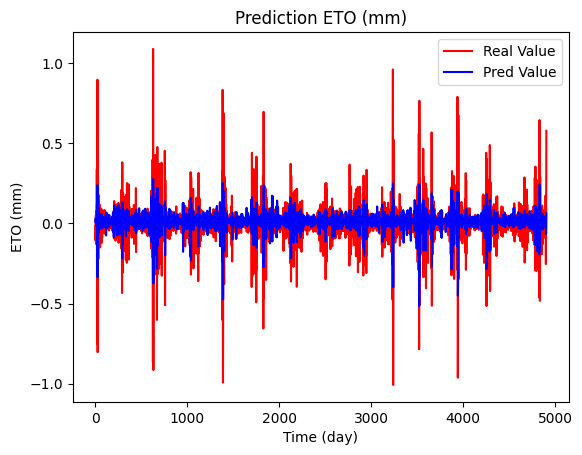

MSE: 0.010237005664999061
MAE: 0.059618831484874485
R²: 0.25385416661584104
RMSE: 0.10117808885820616
pred_finally: [ 0.02802819  0.00390298  0.00387657 ... -0.05790573 -0.01600304
  0.06480224]
prediction_result: [ 0.02802819  0.00390298  0.00387657 ... -0.05790573 -0.01600304
  0.06480224]
lstm_y_turs: [-0.01562149 -0.10756524 -0.02491552 ...  0.08294097  0.29797894
  0.57746203]
-------------------------- 2 --------------------------
            one       two     three      four      five            six  \
0     -0.341676  0.979711 -1.181582  0.350818  2.414864     -59.147632   
1     -0.104460  1.669276 -1.545486  0.553184  1.936741    1205.856175   
2     -0.321276  1.773475 -0.876626  0.632451 -0.862360     165.532785   
3     -0.536460  0.647876  0.331070  0.421779 -3.845997   -1139.985967   
4     -0.454172 -0.598511  1.085067  0.130059 -4.377561      37.511552   
...         ...       ...       ...       ...       ...            ...   
24525 -0.816230 -0.477108 -1.100900 -0.07

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0168 - accuracy: 2.0385e-04 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0074 - accuracy: 2.0385e-04 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0057 - accuracy: 2.0385e-04 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 2.0385e-04 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 2.0385e-04 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 2.0385e-04 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 2.0385e-04 - val_l

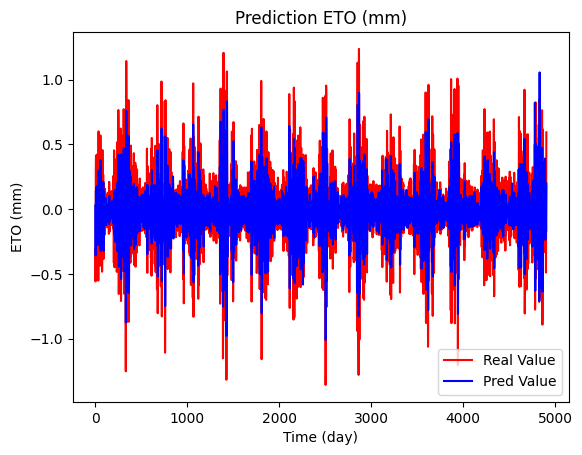

MSE: 0.03880596854373853
MAE: 0.14595184942565856
R²: 0.4956501144735709
RMSE: 0.19699230579831925
pred_finally: [ 0.02857804 -0.18768783 -0.3564069  ... -0.01282218  0.09150041
  0.19769517]
prediction_result: [ 0.02857804 -0.18768783 -0.3564069  ... -0.01282218  0.09150041
  0.19769517]
lstm_y_turs: [-0.30608954 -0.55767852 -0.47324348 ...  0.16486849  0.46517182
  0.59421051]
-------------------------- 3 --------------------------
            one       two     three      four      five            six  \
0     -0.661736  1.203007 -1.923127  0.080471 -1.565418    -384.149923   
1     -0.802548  1.606931 -2.090151  0.157180 -2.150125     245.882729   
2     -0.699025  1.505821 -1.652161  0.134042 -2.440051     507.008948   
3     -0.725270  0.975604 -0.892493  0.064260 -2.023263     -16.046745   
4     -0.697584  0.506975 -0.079269 -0.015150 -0.811144    -337.765596   
...         ...       ...       ...       ...       ...            ...   
24525 -0.376335 -1.304232 -0.481655 -0.09030

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0354 - accuracy: 1.0193e-04 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 1.0193e-04 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 2.0385e-04 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 2.0385e-04 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0043 - accuracy: 2.0385e-04 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 2.0385e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 2.0385e-04 - val_l

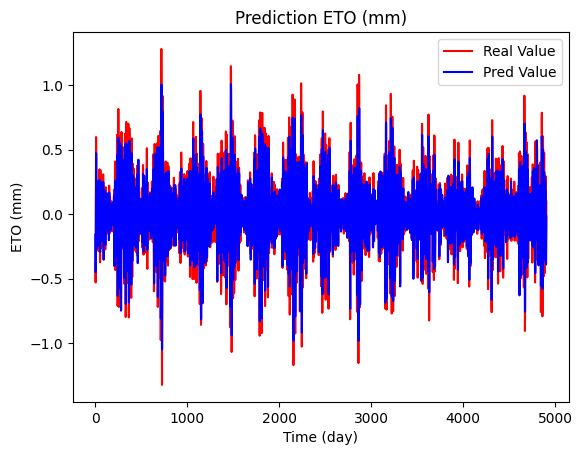

MSE: 0.01934044406284387
MAE: 0.10647957313653149
R²: 0.7727234156338232
RMSE: 0.1390699250839083
pred_finally: [-0.1595208  -0.3396323  -0.4502722  ... -0.26661566 -0.11396862
 -0.0186779 ]
prediction_result: [-0.1595208  -0.3396323  -0.4502722  ... -0.26661566 -0.11396862
 -0.0186779 ]
lstm_y_turs: [-0.38186312 -0.51136228 -0.53018441 ... -0.07308708  0.03796344
  0.09813321]
-------------------------- 4 --------------------------
            one       two     three      four      five           six  \
0     -0.389531  0.586490 -0.654795 -0.110076  2.704542    172.547296   
1     -0.353339  0.560630 -0.630126 -0.125011  2.992187    292.905825   
2     -0.351755  0.394267 -0.444077 -0.086728  3.231139    551.059783   
3     -0.358551  0.163739 -0.154264 -0.028367  3.278532    755.747424   
4     -0.321253 -0.128788  0.188916  0.016481  3.004265    678.752445   
...         ...       ...       ...       ...       ...           ...   
24525  0.433728  0.718367  1.196502  0.126054 -5.309

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0187 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 4.0775e-04
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 4.0775e-04
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 4.0775e-04
Epoch 4/20
307/307 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 4.0775e-04
Epoch 5/20
307/307 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 4.0775e-04
Epoch 6/20
307/307 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 4.0775e-04
Epoch 7/20
307/307 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_l

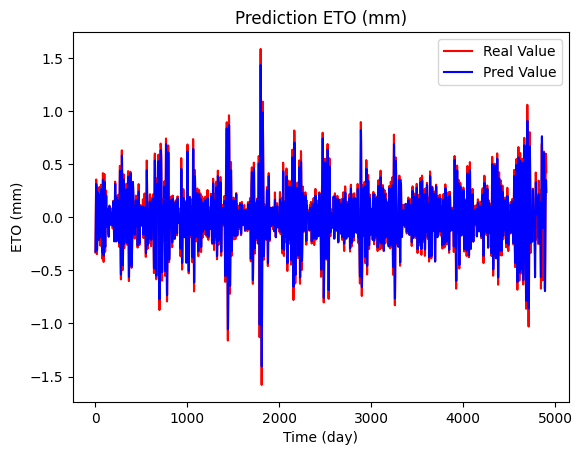

MSE: 0.007886085894821477
MAE: 0.06527752806193435
R²: 0.899876506443773
RMSE: 0.08880363672069673
pred_finally: [-0.32167053 -0.29628444 -0.22908688 ...  0.32419282  0.27928907
  0.23935203]
prediction_result: [-0.32167053 -0.29628444 -0.22908688 ...  0.32419282  0.27928907
  0.23935203]
lstm_y_turs: [-0.33046399 -0.26250496 -0.15866618 ...  0.50942294  0.46093815
  0.42654371]
-------------------------- 5 --------------------------
            one       two     three      four      five           six  \
0     -0.826169 -1.337820  0.515877 -0.021205 -1.880795  -1238.158886   
1     -0.901505 -1.384742  0.647517 -0.022810 -1.979773  -1255.023748   
2     -0.934304 -1.401546  0.774530 -0.041143 -2.080201  -1263.141402   
3     -0.909293 -1.391681  0.891331 -0.073654 -2.165465  -1253.146649   
4     -0.825918 -1.374637  0.992247 -0.116823 -2.215935  -1218.249177   
...         ...       ...       ...       ...       ...           ...   
24525  0.123502 -0.367083 -0.808054 -0.015135  1.66

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 8.8214e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 8.1145e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 6.2988e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 5.8359e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 6.5683e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 6.3597e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0013 - accu

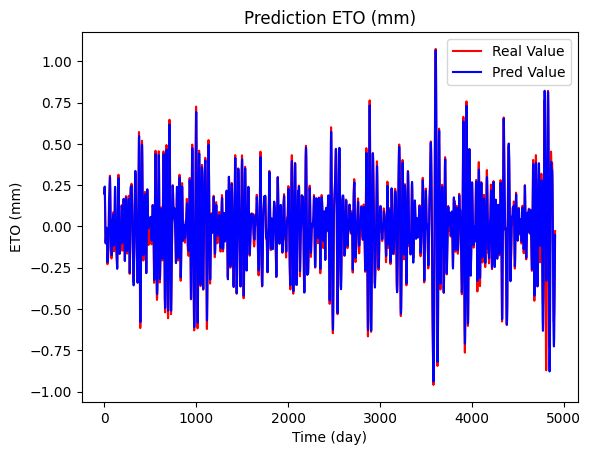

MSE: 0.003183634484795565
MAE: 0.03761414627702541
R²: 0.9495155076915852
RMSE: 0.05642370498997354
pred_finally: [ 0.19990046  0.20857917  0.2169375  ... -0.1528798  -0.08412015
 -0.05257514]
prediction_result: [ 0.19990046  0.20857917  0.2169375  ... -0.1528798  -0.08412015
 -0.05257514]
lstm_y_turs: [ 0.20117115  0.20871215  0.21738666 ... -0.05924301 -0.03032325
 -0.02786112]
-------------------------- 6 --------------------------
            one       two     three      four      five           six  \
0      1.928907  1.199636  0.270012 -0.869554 -1.364838  -1616.392266   
1      1.949215  1.249280  0.288430 -0.873038 -1.372098  -1692.993038   
2      1.959629  1.308219  0.310103 -0.868264 -1.354231  -1744.598684   
3      1.962431  1.375429  0.334793 -0.855393 -1.312153  -1770.009776   
4      1.959622  1.450769  0.360931 -0.834913 -1.248742  -1768.183721   
...         ...       ...       ...       ...       ...           ...   
24525 -0.982413 -0.737453 -0.779654 -0.176705  3.5

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 1ms/step - loss: 0.0167 - accuracy: 1.0193e-04 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0193e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0193e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0193e-04 - val_loss: 7.9328e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0193e-04 - val_loss: 5.8085e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0193e-04 - val_loss: 6.0244e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0193

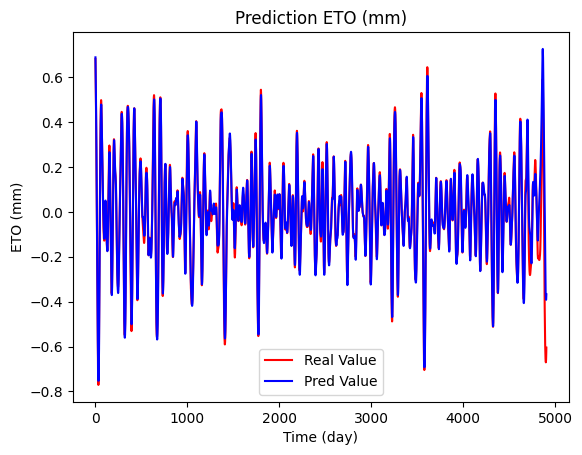

MSE: 0.002151674446637281
MAE: 0.024431296404468818
R²: 0.9518782998399767
RMSE: 0.04638614498573126
pred_finally: [ 0.6876141   0.66120243  0.63192886 ... -0.38814434 -0.3801696
 -0.36721417]
prediction_result: [ 0.6876141   0.66120243  0.63192886 ... -0.38814434 -0.3801696
 -0.36721417]
lstm_y_turs: [ 0.6805114   0.64891006  0.61484291 ... -0.64513045 -0.62748226
 -0.60462463]
-------------------------- 7 --------------------------
            one       two     three      four      five           six  \
0     -3.219874 -5.485443  0.444272  0.209120 -1.074872   -466.674561   
1     -3.227455 -5.520673  0.455919  0.204964 -1.069695   -448.973719   
2     -3.237745 -5.552130  0.464966  0.202024 -1.058711   -429.230702   
3     -3.251243 -5.579408  0.471272  0.200244 -1.041853   -407.346748   
4     -3.268508 -5.602469  0.474697  0.199483 -1.019074   -383.370771   
...         ...       ...       ...       ...       ...           ...   
24525  1.650553  3.775691 -0.054213 -0.171277  1.38

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 8.3345e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 4.7371e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 4.6172e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 0.0000

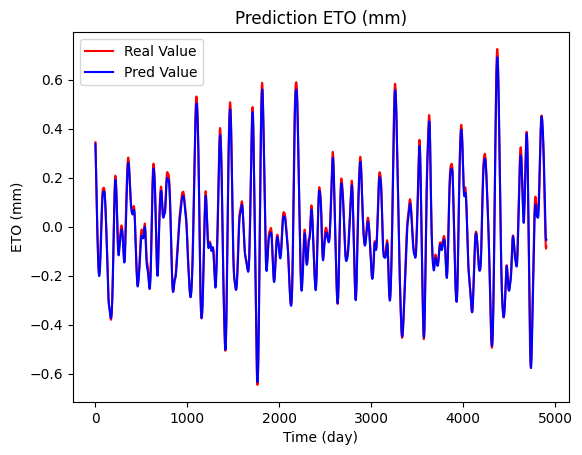

MSE: 0.00040635467218908054
MAE: 0.016146419834644044
R²: 0.9917929189632216
RMSE: 0.020158240800949884
pred_finally: [ 0.33750418  0.3233559   0.30819234 ... -0.05574023 -0.05546093
 -0.05397262]
prediction_result: [ 0.33750418  0.3233559   0.30819234 ... -0.05574023 -0.05546093
 -0.05397262]
lstm_y_turs: [ 0.34474668  0.329054    0.312468   ... -0.08822079 -0.08503254
 -0.08037438]
-------------------------- 8 --------------------------
            one       two     three      four      five           six  \
0      0.795884 -2.062031  0.525401 -0.006315 -0.727792  -1078.049619   
1      0.822904 -2.065012  0.528755 -0.009697 -0.730367  -1086.374612   
2      0.851711 -2.066206  0.532036 -0.013404 -0.731635  -1094.829374   
3      0.882275 -2.065579  0.535246 -0.017434 -0.731553  -1103.436139   
4      0.914519 -2.063140  0.538391 -0.021782 -0.730096  -1112.191238   
...         ...       ...       ...       ...       ...           ...   
24525  3.175849  1.980456  0.699727  0.145954 

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0196 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_l

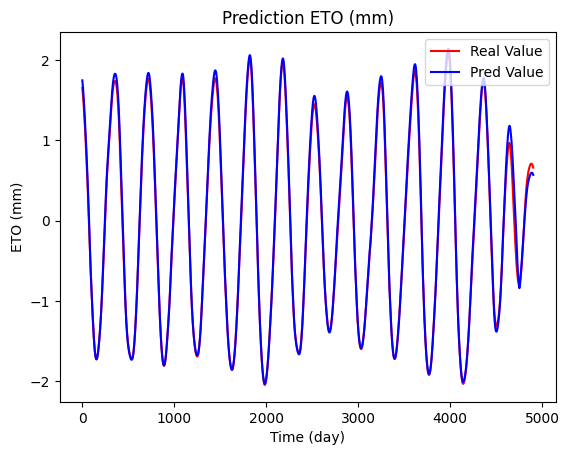

MSE: 0.0047408255740108585
MAE: 0.0495746030319337
R²: 0.9967105096157922
RMSE: 0.06885365330910814
pred_finally: [1.7460779  1.7352473  1.7238588  ... 0.5760275  0.57286626 0.5695392 ]
prediction_result: [1.7460779  1.7352473  1.7238588  ... 0.5760275  0.57286626 0.5695392 ]
lstm_y_turs: [1.65113333 1.64004312 1.62842536 ... 0.66911005 0.66466237 0.65999992]
-------------------------- 9 --------------------------
            one       two     three      four      five           six  \
0     -3.395099 -2.809848 -0.004397  0.231498 -1.222674      4.595343   
1     -3.408695 -2.811715 -0.004194  0.232764 -1.225061      6.431001   
2     -3.422006 -2.813528 -0.003995  0.233998 -1.227102      8.606319   
3     -3.435029 -2.815286 -0.003800  0.235202 -1.228801     11.115898   
4     -3.447763 -2.816988 -0.003610  0.236372 -1.230158     13.950662   
...         ...       ...       ...       ...       ...           ...   
24525  2.425023  1.918073  1.100583  0.069358  1.751016  20640.874202  

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0015 - val_accuracy: 2.0387e-04
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 2.0387e-04
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0014 - val_accuracy: 2.0387e-04
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 2.0387e-04
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 9.1737e-04 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 2.0387e-04
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 7.3117e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 2.0387e-04
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 6.3298e-04 - accuracy: 0.0000

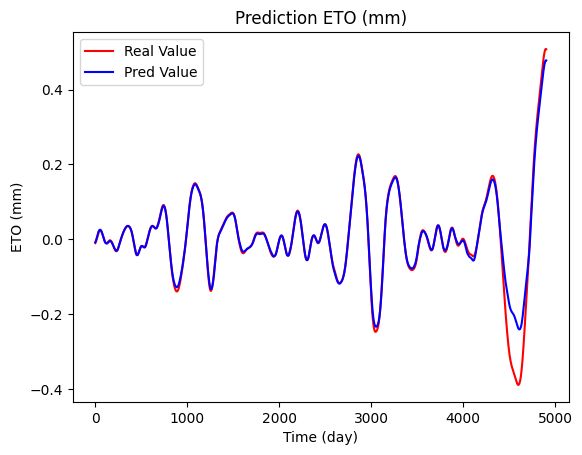

MSE: 0.0008577015744672006
MAE: 0.010137728313162831
R²: 0.9445692932853255
RMSE: 0.0292865425488773
pred_finally: [-0.00781478 -0.00731184 -0.00676847 ...  0.47851357  0.47842345
  0.4782505 ]
prediction_result: [-0.00781478 -0.00731184 -0.00676847 ...  0.47851357  0.47842345
  0.4782505 ]
lstm_y_turs: [-0.01020272 -0.00967183 -0.00910924 ...  0.50870622  0.50846859
  0.50814429]
-------------------------- 10 --------------------------
            one       two     three      four      five           six  \
0     -0.469599 -0.280273 -0.842040 -0.310257  5.121896   -854.141494   
1     -0.470964 -0.279857 -0.844430 -0.310420  5.133671   -853.328051   
2     -0.472273 -0.279384 -0.846795 -0.310560  5.145205   -852.474965   
3     -0.473527 -0.278853 -0.849136 -0.310678  5.156497   -851.581444   
4     -0.474724 -0.278265 -0.851452 -0.310774  5.167548   -850.646626   
...         ...       ...       ...       ...       ...           ...   
24525  0.862693  1.341498 -0.163741  0.045221  0

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0513 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_l

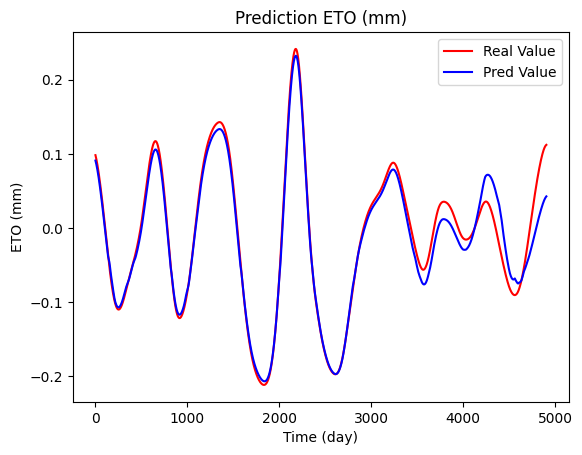

MSE: 0.00032932166410438654
MAE: 0.011836109897016275
R²: 0.9658757923403724
RMSE: 0.018147221939029304
pred_finally: [0.09105988 0.09059498 0.09011687 ... 0.04248582 0.04263715 0.04278136]
prediction_result: [0.09105988 0.09059498 0.09011687 ... 0.04248582 0.04263715 0.04278136]
lstm_y_turs: [0.09834981 0.09785964 0.09735627 ... 0.11204367 0.1121496  0.11224567]
-------------------------- 11 --------------------------
            one       two     three      four      five           six  \
0     -0.770274 -0.335700 -0.511797 -0.136474  1.225237   -525.053920   
1     -0.770275 -0.336619 -0.512329 -0.136544  1.225578   -524.760084   
2     -0.770269 -0.337541 -0.512849 -0.136612  1.225903   -524.449984   
3     -0.770253 -0.338465 -0.513358 -0.136678  1.226211   -524.123608   
4     -0.770229 -0.339391 -0.513856 -0.136742  1.226503   -523.780949   
...         ...       ...       ...       ...       ...           ...   
24525  0.947129  0.354504 -0.382501  0.062982  0.009957  11494.389

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 1ms/step - loss: 0.0492 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 945us/step - loss: 0.0121 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 949us/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 950us/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 9.2092e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 974us/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 7.1311e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 995us/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 6.5063e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 932us/step - loss: 0.0022 - accu

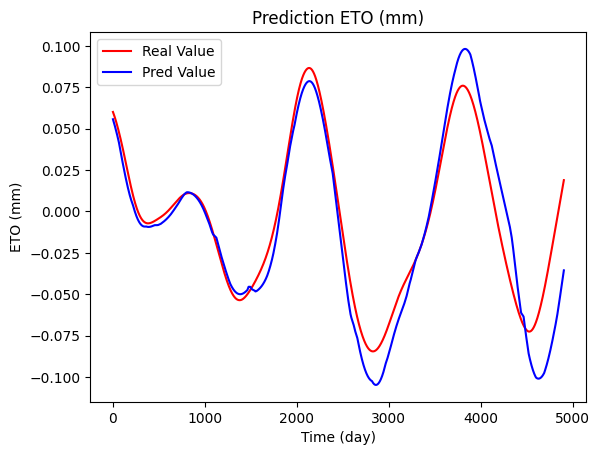

MSE: 0.00033718619804881526
MAE: 0.012912426336466708
R²: 0.8407759874185053
RMSE: 0.018362630477380282
pred_finally: [ 0.05572617  0.05554045  0.05535363 ... -0.03637777 -0.0359846
 -0.0355906 ]
prediction_result: [ 0.05572617  0.05554045  0.05535363 ... -0.03637777 -0.0359846
 -0.0355906 ]
lstm_y_turs: [0.06013331 0.05998498 0.05983527 ... 0.01831739 0.01862247 0.01892721]
-------------------------- 12 --------------------------
            one       two     three      four      five          six     seven
0     -0.293320  0.399027 -0.416052 -0.044624  0.541572  -432.318809 -0.146577
1     -0.293373  0.399370 -0.416079 -0.044669  0.541195  -432.034984 -0.146556
2     -0.293426  0.399711 -0.416105 -0.044713  0.540814  -431.748634 -0.146535
3     -0.293478  0.400049 -0.416130 -0.044756  0.540430  -431.459759 -0.146512
4     -0.293531  0.400385 -0.416155 -0.044799  0.540042  -431.168361 -0.146489
...         ...       ...       ...       ...       ...          ...       ...
24525  0.503

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 928us/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val

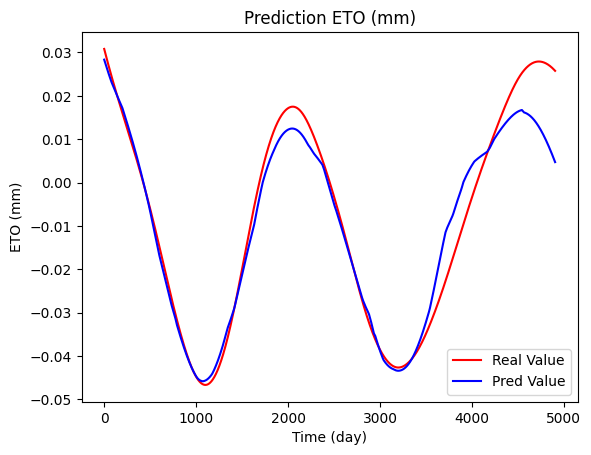

MSE: 3.1496006265850656e-05
MAE: 0.0036595971937134282
R²: 0.9457975003865302
RMSE: 0.005612130278766759
pred_finally: [0.02834052 0.02827184 0.02820327 ... 0.00481269 0.00475688 0.00470098]
prediction_result: [0.02834052 0.02827184 0.02820327 ... 0.00481269 0.00475688 0.00470098]
lstm_y_turs: [0.03081561 0.0307324  0.0306493  ... 0.0258067  0.02578355 0.02576027]
-------------------------- 13 --------------------------
            one       two     three      four      five          six     seven
0     -0.476528 -0.535954  0.058115  0.156373  0.794584  -145.512472 -0.188095
1     -0.476607 -0.536039  0.058120  0.156408  0.794350  -145.482358 -0.187964
2     -0.476685 -0.536123  0.058125  0.156444  0.794115  -145.452379 -0.187833
3     -0.476763 -0.536207  0.058131  0.156480  0.793880  -145.422534 -0.187702
4     -0.476840 -0.536291  0.058136  0.156515  0.793644  -145.392825 -0.187571
...         ...       ...       ...       ...       ...          ...       ...
24525  0.564557  0.2170

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 968us/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 906us/step - loss: 0.0028 - accuracy: 0.0000e+00 - v

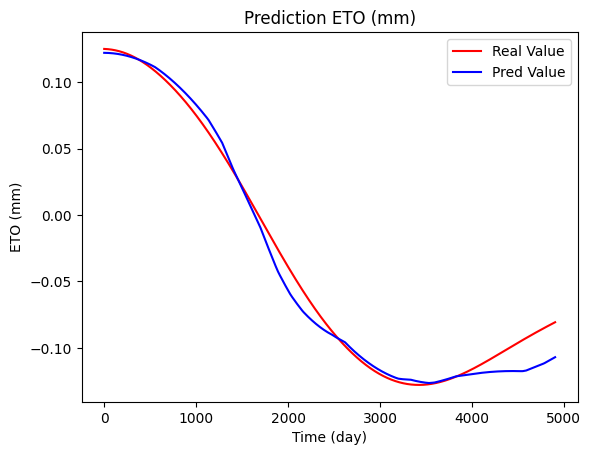

MSE: 0.00010922126835268857
MAE: 0.007435253205653667
R²: 0.9864952934524539
RMSE: 0.010450897968724438
pred_finally: [ 0.12224074  0.12224028  0.12223975 ... -0.10712115 -0.107083
 -0.10704484]
prediction_result: [ 0.12224074  0.12224028  0.12223975 ... -0.10712115 -0.107083
 -0.10704484]
lstm_y_turs: [ 0.12518942  0.12518682  0.12518412 ... -0.08077764 -0.0807417
 -0.08070578]
-------------------------- 14 --------------------------
            one       two     three      four      five          six     seven
0      6.384564  2.351739  0.427714  1.171439  0.323124   546.749846  0.072279
1      6.384626  2.351738  0.427732  1.171515  0.323070   546.746225  0.072317
2      6.384688  2.351736  0.427750  1.171591  0.323016   546.742637  0.072355
3      6.384749  2.351735  0.427769  1.171667  0.322962   546.739081  0.072393
4      6.384811  2.351734  0.427787  1.171742  0.322908   546.735558  0.072431
...         ...       ...       ...       ...       ...          ...       ...
24525  7

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 1ms/step - loss: 0.0125 - accuracy: 1.0193e-04 - val_loss: 0.4201 - val_accuracy: 0.0000e+00
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0024 - accuracy: 1.0193e-04 - val_loss: 0.3590 - val_accuracy: 0.0000e+00
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0193e-04 - val_loss: 0.3550 - val_accuracy: 0.0000e+00
Epoch 4/20
307/307 [==============================] - 0s 1ms/step - loss: 9.8487e-04 - accuracy: 1.0193e-04 - val_loss: 0.3359 - val_accuracy: 0.0000e+00
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 6.9542e-04 - accuracy: 1.0193e-04 - val_loss: 0.3283 - val_accuracy: 0.0000e+00
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 5.9809e-04 - accuracy: 1.0193e-04 - val_loss: 0.3371 - val_accuracy: 0.0000e+00
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 5.1109e-04 - accuracy: 1.

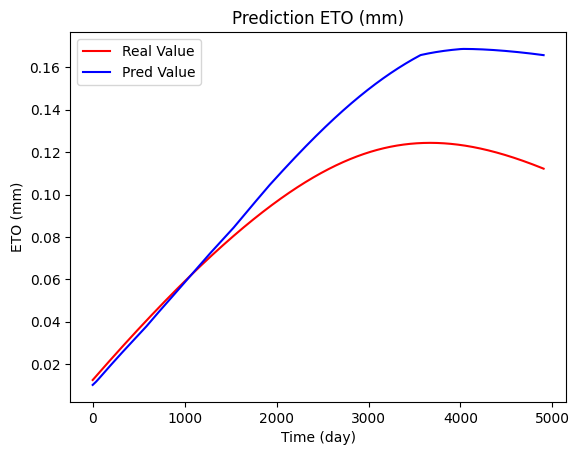

MSE: 0.0008548874359634421
MAE: 0.022481509658897596
R²: 0.24640895057090328
RMSE: 0.02923845816665855
pred_finally: [0.01019999 0.01023935 0.0102787  ... 0.1657855  0.16577965 0.1657738 ]
prediction_result: [0.01019999 0.01023935 0.0102787  ... 0.1657855  0.16577965 0.1657738 ]
lstm_y_turs: [0.0125133  0.01256298 0.01261267 ... 0.11225316 0.11223564 0.11221812]
-------------------------- 15 --------------------------
             one        two     three      four       five          six  \
0      15.116889  11.746817  5.049037  2.831638  76.451014  5656.498029   
1      15.116868  11.746819  5.049030  2.831603  76.450965  5656.492634   
2      15.116847  11.746820  5.049022  2.831569  76.450915  5656.487220   
3      15.116826  11.746821  5.049014  2.831534  76.450866  5656.481787   
4      15.116805  11.746823  5.049006  2.831500  76.450817  5656.476336   
...          ...        ...       ...       ...        ...          ...   
24525  15.959476  13.210562  4.650699  1.285862  71.5

<timed exec>:83: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


307/307 [==============================] - 1s 1ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0300 - val_accuracy: 2.0387e-04
Epoch 2/20
307/307 [==============================] - 0s 1ms/step - loss: 7.4515e-04 - accuracy: 0.0000e+00 - val_loss: 0.0183 - val_accuracy: 2.0387e-04
Epoch 3/20
307/307 [==============================] - 0s 1ms/step - loss: 4.7207e-04 - accuracy: 0.0000e+00 - val_loss: 0.0147 - val_accuracy: 2.0387e-04
Epoch 4/20
307/307 [==============================] - 0s 2ms/step - loss: 2.9270e-04 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 2.0387e-04
Epoch 5/20
307/307 [==============================] - 0s 1ms/step - loss: 2.3734e-04 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 2.0387e-04
Epoch 6/20
307/307 [==============================] - 0s 1ms/step - loss: 2.1208e-04 - accuracy: 0.0000e+00 - val_loss: 0.0131 - val_accuracy: 2.0387e-04
Epoch 7/20
307/307 [==============================] - 0s 1ms/step - loss: 1.9124e-04 - accu

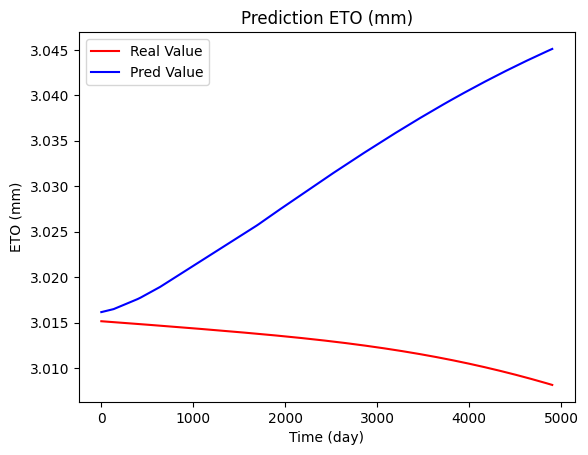

MSE: 0.00044606419210256257
MAE: 0.01815325212583792
R²: -118.72328433943096
RMSE: 0.02112023181933765
pred_finally: [3.0161488 3.01615   3.0161521 ... 3.0450892 3.0450938 3.0450983]
prediction_result: [3.0161488 3.01615   3.0161521 ... 3.0450892 3.0450938 3.0450983]
lstm_y_turs: [3.01514353 3.01514279 3.01514205 ... 3.00814312 3.00814013 3.00813714]
CPU times: total: 13min 31s
Wall time: 11min 8s


In [25]:
%%time
imf_choose = 0
finally_rsult = []
finally_y_true = []

for imf_run in range(int(len(IMF) / 7)):
    ALL_Factor_IMF = IMF[imf_choose:imf_choose+7][:]
    imf_choose = imf_choose + 7

    print('--------------------------',imf_run,'--------------------------')
    ALL_Factor_IMF = np.array(ALL_Factor_IMF)
    IMF_Input = np.transpose(ALL_Factor_IMF)

    df_IMF = pd.DataFrame(IMF_Input)
    df_IMF.columns = ['one','two','three','four','five','six', 'seven']

    print(df_IMF)

    scaler = MinMaxScaler(feature_range=(0, 1))
    df = scaler.fit_transform(df_IMF)

    #数据集划分
    test_split = round(len(df) * 0.20)
    print(test_split)
    def splitData(var, per_test):
        num_test = int(len(var) * per_test)
        train_size = int(len(var) - num_test)
        train_data = var[0:train_size]
        test_data = var[train_size:train_size + num_test]
        return train_data, test_data


    df_training, df_testing = splitData(df, 0.2)
    print('df_training.shape:',df_training.shape)
    print('df_testing.shape:',df_testing.shape)

    def createXY(data,n_past,n_steps_out):
        dataX,dataY = list(),list()

        for i in range(len(data)):
            ## such as: len(data) = 19624
            end_ix = i + n_past ## 0+3=3,1+3=4,...,19618+3=19621
            out_end_ix = end_ix + n_steps_out ## 3+3=6,4+3=7,...,19621+3=19624
            # print('out_end_ix:',out_end_ix)
            '''
            加入此处判断，使得最终的dataX和dataY中每行的数组长度一致，进而可以转换为array(数组),如若不加以限制，
            则导致最后几次循环由于i是在len(data)范围内的，
            但是由于out_end_ix=end_ix + n_steps_out,最终会超出data的数据范围，而导致其无法获取到数据,
            加入dataY之后，最后几行的数据长度是和前面的数据长度不一致，最终导致无法进行array转换
            '''
            if out_end_ix > len(data): ## 6 < len(data),7<len(data),...,19623+3=19626>len(data)=19624
                # print("------------out_end_ix of end",out_end_ix,'---------------')
                break

            dataX.append(data[i:end_ix,0:data.shape[1]]) ## 0:3,0:7;1:4,0:7
            dataY.append(data[end_ix:out_end_ix,data.shape[1]-1]) ##3:6,6;4:7,6
        return np.array(dataX), np.array(dataY)

    n_past=1
    n_steps_out=1

    trainX, trainY = createXY(df_training, n_past, n_steps_out)
    testX, testY = createXY(df_testing, n_past, n_steps_out)

    result_reshape_1 = trainX.shape[0]
    result_reshape_2 = trainX.shape[2]

    print('trainX.Shape:----', trainX.shape)
    print('trainY.shape:----', trainY.shape)
    print('testX.shape:----', testX.shape)
    print('testY.shape:----', testY.shape)
    print('----------------------------',imf_run,'------------------------------')

    def CnnLSTM(optimizer='adam', batch_size=32, epochs=40):
        model = Sequential()
        model.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))
        model.add(MaxPooling1D(pool_size=1))
        model.add(Flatten())
        model.add(Dropout(0.1))
        # model.add(Dense(100, activation='relu'))
        model.add(Dense(trainY.shape[1]))
        # model.add(Activation('linear'))
        model.compile(optimizer=optimizer, loss='mse', metrics='accuracy')
        return model


    N_LSTM_Model = KerasRegressor(CnnLSTM, epochs=40, verbose=1, validation_data=(testX, testY))
    # N_LSTM_Model = KerasRegressor(N_LSTM, epochs=40, verbose=1)

    from sklearn.model_selection import GridSearchCV

    # 定义超参数搜索范围
    param_grid = {
        'optimizer': ['adam'],
        'batch_size': [32, 64],
        'epochs': [20]
        # 'batch_size': [64],
        # 'epochs': [40]
    }

    # 执行网格搜索
    grid = GridSearchCV(estimator=N_LSTM_Model, param_grid=param_grid, cv=2)
    grid_result = grid.fit(trainX, trainY)

    best_params = grid_result.best_params_

    best_params
    print('prediction' , 'one' ,'day best_params:', best_params)

    best_model = grid_result.best_estimator_

    y_trues,prediction_result = Result_Ana(best_model, 7)

    print('prediction_result:',prediction_result)
    finally_rsult.append(prediction_result)
    print('lstm_y_turs:',y_trues)
    finally_y_true.append(y_trues)

    mixer.music.play()
    time.sleep(1)
    mixer.music.stop()

In [167]:
# WL(Water Level(m)) For IMF1-IMF13-R True Value
finally_y_true

[array([-0.22846669, -0.9194061 ,  0.47041622, ...,  0.22694627,
        -0.03973494,  0.43138383]),
 array([-0.01562149, -0.10756524, -0.02491552, ...,  0.08294097,
         0.29797894,  0.57746203]),
 array([-0.30608954, -0.55767852, -0.47324348, ...,  0.16486849,
         0.46517182,  0.59421051]),
 array([-0.38186312, -0.51136228, -0.53018441, ..., -0.07308708,
         0.03796344,  0.09813321]),
 array([-0.33046399, -0.26250496, -0.15866618, ...,  0.50942294,
         0.46093815,  0.42654371]),
 array([ 0.20117115,  0.20871215,  0.21738666, ..., -0.05924301,
        -0.03032325, -0.02786112]),
 array([ 0.6805114 ,  0.64891006,  0.61484291, ..., -0.64513045,
        -0.62748226, -0.60462463]),
 array([ 0.34474668,  0.329054  ,  0.312468  , ..., -0.08822079,
        -0.08503254, -0.08037438]),
 array([1.65113333, 1.64004312, 1.62842536, ..., 0.66911005, 0.66466237,
        0.65999992]),
 array([-0.01020272, -0.00967183, -0.00910924, ...,  0.50870622,
         0.50846859,  0.50814429

In [168]:
finally_ytrue_r = np.array(finally_y_true)

In [169]:
finally_ytrue_r

array([[-0.22846669, -0.9194061 ,  0.47041622, ...,  0.22694627,
        -0.03973494,  0.43138383],
       [-0.01562149, -0.10756524, -0.02491552, ...,  0.08294097,
         0.29797894,  0.57746203],
       [-0.30608954, -0.55767852, -0.47324348, ...,  0.16486849,
         0.46517182,  0.59421051],
       ...,
       [ 0.12518942,  0.12518682,  0.12518412, ..., -0.08077764,
        -0.0807417 , -0.08070578],
       [ 0.0125133 ,  0.01256298,  0.01261267, ...,  0.11225316,
         0.11223564,  0.11221812],
       [ 3.01514353,  3.01514279,  3.01514205, ...,  3.00814312,
         3.00814013,  3.00813714]])

In [170]:
reshape2 = len(finally_ytrue_r)

In [171]:
reshape2

16

In [172]:
finally_column_names = []

for i in range(1, reshape2+1):
    if i < (reshape2):
        finally_column_names.append("IMF"+str(i))
    else:
        finally_column_names.append("Residual")

In [173]:
finally_column_names

['IMF1',
 'IMF2',
 'IMF3',
 'IMF4',
 'IMF5',
 'IMF6',
 'IMF7',
 'IMF8',
 'IMF9',
 'IMF10',
 'IMF11',
 'IMF12',
 'IMF13',
 'IMF14',
 'IMF15',
 'Residual']

In [174]:
ALL_Factor_ReIMFS_Yture_Result = np.transpose(finally_ytrue_r)

In [175]:
ALL_Factor_ReIMFS_Yture_Result = ALL_Factor_ReIMFS_Yture_Result.reshape(4905,reshape2)

In [176]:
all_factor_ceemdan_true = pd.DataFrame(ALL_Factor_ReIMFS_Yture_Result, columns=finally_column_names)
all_factor_ceemdan_true

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8,IMF9,IMF10,IMF11,IMF12,IMF13,IMF14,IMF15,Residual
0,-0.228467,-0.015621,-0.306090,-0.381863,-0.330464,0.201171,0.680511,0.344747,1.651133,-0.010203,0.098350,0.060133,0.030816,0.125189,0.012513,3.015144
1,-0.919406,-0.107565,-0.557679,-0.511362,-0.262505,0.208712,0.648910,0.329054,1.640043,-0.009672,0.097860,0.059985,0.030732,0.125187,0.012563,3.015143
2,0.470416,-0.024916,-0.473243,-0.530184,-0.158666,0.217387,0.614843,0.312468,1.628425,-0.009109,0.097356,0.059835,0.030649,0.125184,0.012613,3.015142
3,0.602786,0.021981,0.036155,-0.381917,-0.035448,0.227176,0.578793,0.295128,1.616288,-0.008516,0.096840,0.059684,0.030566,0.125181,0.012662,3.015141
4,0.124968,0.050491,0.303936,-0.044038,0.086976,0.235256,0.540961,0.277149,1.603638,-0.007894,0.096310,0.059532,0.030483,0.125178,0.012712,3.015141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,-0.251898,-0.127204,-0.489493,-0.306566,0.597399,-0.170538,-0.665472,-0.089639,0.677342,0.508919,0.111802,0.017706,0.025853,-0.080850,0.112288,3.008149
4901,-0.296357,-0.027485,-0.199179,-0.203301,0.563445,-0.109097,-0.657591,-0.089804,0.673339,0.508856,0.111928,0.018012,0.025830,-0.080814,0.112271,3.008146
4902,0.226946,0.082941,0.164868,-0.073087,0.509423,-0.059243,-0.645130,-0.088221,0.669110,0.508706,0.112044,0.018317,0.025807,-0.080778,0.112253,3.008143
4903,-0.039735,0.297979,0.465172,0.037963,0.460938,-0.030323,-0.627482,-0.085033,0.664662,0.508469,0.112150,0.018622,0.025784,-0.080742,0.112236,3.008140


In [177]:
sums = all_factor_ceemdan_true.iloc[:, :].sum(axis=1)

# 将求和结果添加到DataFrame中作为新的一列
all_factor_ceemdan_true["True"] = sums

In [178]:
# 保存为CSV文件
all_factor_ceemdan_true.to_csv("Result/CEEMDAN/one_day_CEEMDAN_IMF"+str(reshape2-1)+"-CNN_true.csv", index=False)

In [179]:
# WL(Water Level(m)) IMF1-IMF13-R Prediction Value
finally_rsult

[array([-0.23589398, -0.00229693,  0.17881492, ...,  0.1271679 ,
        -0.25060254,  0.11220078], dtype=float32),
 array([ 0.02802819,  0.00390298,  0.00387657, ..., -0.05790573,
        -0.01600304,  0.06480224], dtype=float32),
 array([ 0.02857804, -0.18768783, -0.3564069 , ..., -0.01282218,
         0.09150041,  0.19769517], dtype=float32),
 array([-0.1595208 , -0.3396323 , -0.4502722 , ..., -0.26661566,
        -0.11396862, -0.0186779 ], dtype=float32),
 array([-0.32167053, -0.29628444, -0.22908688, ...,  0.32419282,
         0.27928907,  0.23935203], dtype=float32),
 array([ 0.19990046,  0.20857917,  0.2169375 , ..., -0.1528798 ,
        -0.08412015, -0.05257514], dtype=float32),
 array([ 0.6876141 ,  0.66120243,  0.63192886, ..., -0.38814434,
        -0.3801696 , -0.36721417], dtype=float32),
 array([ 0.33750418,  0.3233559 ,  0.30819234, ..., -0.05574023,
        -0.05546093, -0.05397262], dtype=float32),
 array([1.7460779 , 1.7352473 , 1.7238588 , ..., 0.5760275 , 0.57286626,

In [180]:
finally_r = np.array(finally_rsult)

In [181]:
finally_r

array([[-2.35893980e-01, -2.29692529e-03,  1.78814918e-01, ...,
         1.27167895e-01, -2.50602543e-01,  1.12200782e-01],
       [ 2.80281939e-02,  3.90297733e-03,  3.87656712e-03, ...,
        -5.79057261e-02, -1.60030425e-02,  6.48022369e-02],
       [ 2.85780393e-02, -1.87687829e-01, -3.56406897e-01, ...,
        -1.28221810e-02,  9.15004089e-02,  1.97695166e-01],
       ...,
       [ 1.22240737e-01,  1.22240275e-01,  1.22239754e-01, ...,
        -1.07121147e-01, -1.07083000e-01, -1.07044838e-01],
       [ 1.01999938e-02,  1.02393534e-02,  1.02786981e-02, ...,
         1.65785506e-01,  1.65779650e-01,  1.65773794e-01],
       [ 3.01614881e+00,  3.01615000e+00,  3.01615214e+00, ...,
         3.04508924e+00,  3.04509377e+00,  3.04509830e+00]], dtype=float32)

In [182]:
ALL_Factor_ReIMFS_Result = np.transpose(finally_r)

In [183]:
ALL_Factor_ReIMFS_Result = ALL_Factor_ReIMFS_Result.reshape(4905,reshape2)

In [184]:
finally_column_names

['IMF1',
 'IMF2',
 'IMF3',
 'IMF4',
 'IMF5',
 'IMF6',
 'IMF7',
 'IMF8',
 'IMF9',
 'IMF10',
 'IMF11',
 'IMF12',
 'IMF13',
 'IMF14',
 'IMF15',
 'Residual']

In [185]:
all_factor_ceemdan_prediction = pd.DataFrame(ALL_Factor_ReIMFS_Result,columns=finally_column_names)

In [186]:
all_factor_ceemdan_prediction

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7,IMF8,IMF9,IMF10,IMF11,IMF12,IMF13,IMF14,IMF15,Residual
0,-0.235894,0.028028,0.028578,-0.159521,-0.321671,0.199900,0.687614,0.337504,1.746078,-0.007815,0.091060,0.055726,0.028341,0.122241,0.010200,3.016149
1,-0.002297,0.003903,-0.187688,-0.339632,-0.296284,0.208579,0.661202,0.323356,1.735247,-0.007312,0.090595,0.055540,0.028272,0.122240,0.010239,3.016150
2,0.178815,0.003877,-0.356407,-0.450272,-0.229087,0.216937,0.631929,0.308192,1.723859,-0.006768,0.090117,0.055354,0.028203,0.122240,0.010279,3.016152
3,-0.027757,0.013616,-0.258597,-0.419630,-0.148205,0.225724,0.600255,0.292143,1.711923,-0.006186,0.089626,0.055166,0.028135,0.122239,0.010318,3.016155
4,-0.085605,0.022999,0.010105,-0.239031,-0.037747,0.234871,0.566579,0.275343,1.699449,-0.005567,0.089122,0.054977,0.028066,0.122238,0.010357,3.016157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,-0.127468,-0.065801,-0.088557,-0.391537,0.345690,-0.317402,-0.391596,-0.052271,0.581828,0.478444,0.042162,-0.037162,0.004924,-0.107198,0.165797,3.045080
4901,-0.062240,-0.056997,-0.171890,-0.388020,0.349929,-0.233709,-0.391731,-0.054700,0.579017,0.478520,0.042327,-0.036770,0.004868,-0.107159,0.165791,3.045085
4902,0.127168,-0.057906,-0.012822,-0.266616,0.324193,-0.152880,-0.388144,-0.055740,0.576028,0.478514,0.042486,-0.036378,0.004813,-0.107121,0.165786,3.045089
4903,-0.250603,-0.016003,0.091500,-0.113969,0.279289,-0.084120,-0.380170,-0.055461,0.572866,0.478423,0.042637,-0.035985,0.004757,-0.107083,0.165780,3.045094


In [187]:
sums = all_factor_ceemdan_prediction.iloc[:, :].sum(axis=1)

# 将求和结果添加到DataFrame中作为新的一列
all_factor_ceemdan_prediction["Pred"] = sums

In [188]:
prediction_file_path = "Result/CEEMDAN/one_day_CEEMDAN_IMF"+str(reshape2-1)+"-CNN_prediction.csv"

In [189]:
# 保存为CSV文件
all_factor_ceemdan_prediction.to_csv(prediction_file_path, index=False)

### 验证最终结果

In [190]:
df = pd.read_csv(prediction_file_path)
df = df[['Pred']]

In [191]:
df

,Pred
0,5.626519
1,5.422111
2,5.343419
3,5.304924
4,5.762316
...,...
4900,3.084932
4901,3.162321
4902,3.686468
4903,3.636954


In [192]:
true_file_path = "Result/CEEMDAN/one_day_CEEMDAN_IMF"+str(reshape2-1)+"-CNN_true.csv"

In [196]:
origin = pd.read_csv(true_file_path)

In [197]:
origin = origin[['True']]

In [198]:
# y_true = origin.iloc[:,len(origin.columns)-1]
y_true = origin

In [199]:
y_true
pred = df

In [200]:
y_true

,True
0,4.9470
1,3.8000
2,5.3882
3,6.2925
4,6.5108
...,...
4900,2.8778
4901,3.3582
4902,4.4921
4903,4.8488


In [201]:
pred

,Pred
0,5.626519
1,5.422111
2,5.343419
3,5.304924
4,5.762316
...,...
4900,3.084932
4901,3.162321
4902,3.686468
4903,3.636954


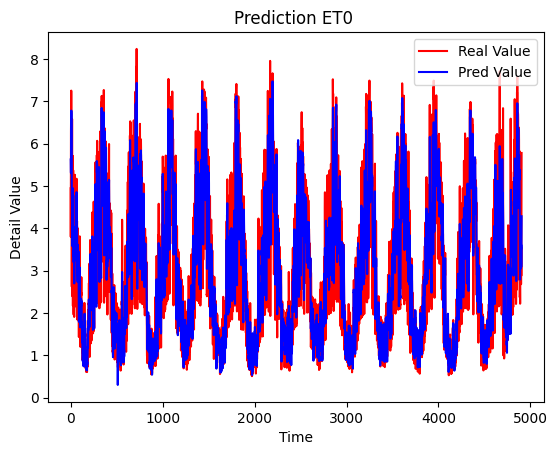

MSE: 0.46592337986528853
MAE: 0.5053966930356779
R²: 0.8468945447870445
RMSE: 0.6825858040314702
pred_finally:           Pred
0     5.626519
1     5.422111
2     5.343419
3     5.304924
4     5.762316
...        ...
4900  3.084932
4901  3.162321
4902  3.686468
4903  3.636954
4904  4.285119

[4905 rows x 1 columns]


In [202]:
plt.plot(y_true, color='red', label='Real Value')
plt.plot(pred, color='blue', label='Pred Value')
plt.title('Prediction ET0 ')
plt.xlabel('Time')
plt.ylabel('Detail Value')
plt.legend()
# plt.savefig('../Images/SW_IN_F_Train_'+'n_past='+'{}'.format((trainX[1].shape)[0])+'_epochs={}'.format((grid_search.best_params_)['epochs'])+'.png',dpi=600)
plt.show()
# y_true_data = pd.DataFrame(y)
# y_true_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_True' + '.csv',
#               index=False)
# pred_data = pd.DataFrame(pred)
# pred_data.to_csv('../ResultAnaAndProcess/Result/All Features/RF/37390_300/' + 'RF_{}'.format(site_name) + '_Pre' + '.csv',
#              index=False)
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2

print('MSE:', mse(y_true, pred))
print('MAE:', mae(y_true, pred))
print('R²:', r2(y_true, pred))
print('RMSE:', np.sqrt(mse(y_true, pred)))
print('pred_finally:', pred)

## 6. ConvLSTM

A type of LSTM related to the CNN-LSTM is the ConvLSTM, where the convolutional reading of input is built directly into each LSTM unit.

The ConvLSTM was developed for reading two-dimensional spatial-temporal data, but can be adapted for use with univariate time series forecasting.

In [ ]:
# # univariate convlstm example
# from numpy import array
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import ConvLSTM2D
#
#
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps
#         # check if we are beyond the sequence
#         if end_ix > len(sequence) - 1:
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)
#
#
# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
# n_steps = 4
# # split into samples
# X, y = split_sequence(raw_seq, n_steps)
# # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
# n_features = 1
# n_seq = 2
# n_steps = 2
# X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# # define model
# model = Sequential()
# model.add(ConvLSTM2D(filters=64, kernel_size=(1, 2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
# model.add(Flatten())
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=500, verbose=0)
# # demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

* ## Encoder-Decoder LSTM


In [144]:
# # univariate multi-step encoder-decoder lstm example
# from numpy import array
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
# from keras.layers import RepeatVector
# from keras.layers import TimeDistributed
#
#
# # split a univariate sequence into samples
# def split_sequence(sequence, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out
#         # check if we are beyond the sequence
#         if out_end_ix > len(sequence):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)
#
#
# # define input sequence
# raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# # choose a number of time steps
# n_steps_in, n_steps_out = 3, 2
# # split into samples
# X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# # reshape from [samples, timesteps] into [samples, timesteps, features]
# n_features = 1
# X = X.reshape((X.shape[0], X.shape[1], n_features))
# y = y.reshape((y.shape[0], y.shape[1], n_features))
# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
# model.add(RepeatVector(n_steps_out))
# model.add(LSTM(100, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(1)))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=100, verbose=0)
# # demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

* ## Multivariate Multi-Step LSTM Models


In [145]:
# # multivariate multi-step stacked lstm example
# from numpy import array
# from numpy import hstack
# from keras.models import Sequential
# from keras.layers import LSTM
# from keras.layers import Dense
#
#
# # split a multivariate sequence into samples
# def split_sequences(sequences, n_steps_in, n_steps_out):
#     X, y = list(), list()
#     for i in range(len(sequences)):
#         # find the end of this pattern
#         end_ix = i + n_steps_in
#         out_end_ix = end_ix + n_steps_out - 1
#         # check if we are beyond the dataset
#         if out_end_ix > len(sequences):
#             break
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1:out_end_ix, -1]
#         X.append(seq_x)
#         y.append(seq_y)
#     return array(X), array(y)
#
#
# # define input sequence
# in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
# in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
# out_seq = array([in_seq1[i] + in_seq2[i] for i in range(len(in_seq1))])
# # convert to [rows, columns] structure
# in_seq1 = in_seq1.reshape((len(in_seq1), 1))
# in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# out_seq = out_seq.reshape((len(out_seq), 1))
# # horizontally stack columns
# dataset = hstack((in_seq1, in_seq2, out_seq))
# # choose a number of time steps
# n_steps_in, n_steps_out = 3, 2
# # covert into input/output
# X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# # the dataset knows the number of features, e.g. 2
# n_features = X.shape[2]
# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
# model.add(LSTM(100, activation='relu'))
# model.add(Dense(n_steps_out))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(X, y, epochs=200, verbose=0)
# # demonstrate prediction
# x_input = array([[70, 75], [80, 85], [90, 95]])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=0)
# print(yhat)

Reference:-  https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecastings/